<a href="https://colab.research.google.com/github/ultralegendshubh/Brain_Tumor_Classification_-MRI-/blob/main/Brain_Tumor_Classification_(MRI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 88% 76.0M/86.8M [00:00<00:00, 211MB/s]
100% 86.8M/86.8M [00:00<00:00, 194MB/s]


In [5]:
from zipfile import ZipFile

In [6]:
# extractinig the compressed images

dataset = "/content/brain-tumor-classification-mri.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [7]:
!ls

brain-tumor-classification-mri.zip  kaggle.json  sample_data  Testing  Training


In [8]:
# import the dependancies


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split






In [9]:
for dirpath,dirnames,filenames in os.walk("/content/Testing"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

there are 4 directories and 0 images in '/content/Testing
there are 0 directories and 115 images in '/content/Testing/meningioma_tumor
there are 0 directories and 105 images in '/content/Testing/no_tumor
there are 0 directories and 100 images in '/content/Testing/glioma_tumor
there are 0 directories and 74 images in '/content/Testing/pituitary_tumor


In [10]:
for dirpath,dirnames,filenames in os.walk("/content/Training"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

there are 4 directories and 0 images in '/content/Training
there are 0 directories and 822 images in '/content/Training/meningioma_tumor
there are 0 directories and 395 images in '/content/Training/no_tumor
there are 0 directories and 826 images in '/content/Training/glioma_tumor
there are 0 directories and 827 images in '/content/Training/pituitary_tumor


In [11]:
# Assign test, train dir


test_dir = "/content/Testing"
train_dir = "/content/Training"

In [12]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


In [13]:
# lets view the images randomly

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  target_folder = target_dir + '/' + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"image shape : {img.shape}")

  return img

image shape : (512, 512, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

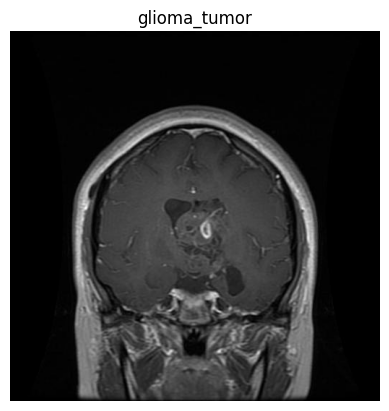

In [14]:
view_random_image(target_dir = train_dir,
                  target_class = random.choice(class_names))

In [15]:
# processing the data


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(
                                               train_dir,
                                               target_size =(224,224),
                                               batch_size = 32,
                                               class_mode = "categorical"
)

test_data = test_datagen.flow_from_directory(
                                              test_dir,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = "categorical"
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [17]:
# Creating the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [18]:
model_1 = Sequential([
                      Conv2D(11,3, activation = "relu", input_shape = (224,224,3)),
                      Conv2D(11,3, activation = "relu"),

                      MaxPool2D(),

                      Flatten(),

                      Dense(50, activation = "relu"),
                      Dense(4, activation = "softmax")


])

In [19]:
model_1.compile(
                loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
)

In [20]:
history_1 = model_1.fit(
                  train_data,
                  epochs = 10,
                  steps_per_epoch = len(train_data),
                  validation_data = test_data,
                  validation_steps = len(test_data)
)

Epoch 1/10
90/90 [==============================] - 33s 208ms/step - loss: 1.5694 - accuracy: 0.5620 - val_loss: 1.8542 - val_accuracy: 0.4848
Epoch 2/10
90/90 [==============================] - 16s 175ms/step - loss: 0.4297 - accuracy: 0.8251 - val_loss: 1.6904 - val_accuracy: 0.6269
Epoch 3/10
90/90 [==============================] - 16s 173ms/step - loss: 0.1882 - accuracy: 0.9366 - val_loss: 2.1398 - val_accuracy: 0.6929
Epoch 4/10
90/90 [==============================] - 18s 195ms/step - loss: 0.0683 - accuracy: 0.9857 - val_loss: 3.1661 - val_accuracy: 0.7563
Epoch 5/10
90/90 [==============================] - 13s 140ms/step - loss: 0.0293 - accuracy: 0.9958 - val_loss: 2.8247 - val_accuracy: 0.7766
Epoch 6/10
90/90 [==============================] - 8s 92ms/step - loss: 0.0121 - accuracy: 0.9986 - val_loss: 3.3591 - val_accuracy: 0.7513
Epoch 7/10
90/90 [==============================] - 9s 105ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 3.6870 - val_accuracy: 0.7614
Ep

In [21]:
model_1.evaluate(test_data)

13/13 [==============================] - 1s 99ms/step - loss: 4.2892 - accuracy: 0.7766


[4.289249420166016, 0.7766497731208801]

In [22]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();



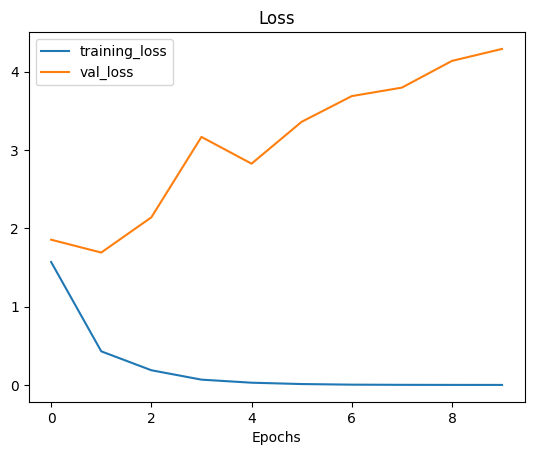

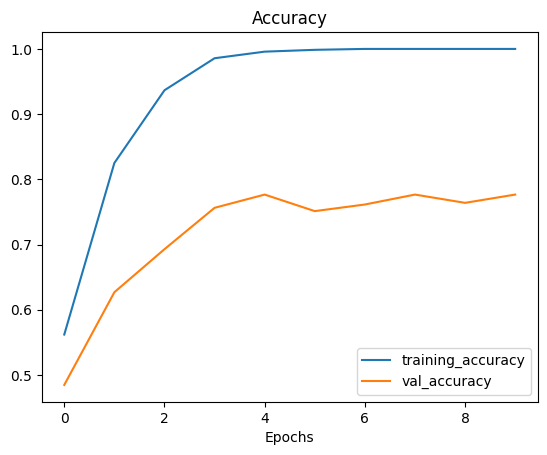

In [23]:
plot_loss_curves(history_1)

In [24]:

model_2 = tf.keras.models.Sequential([

          tf.keras.layers.Conv2D(filters = 10,kernel_size = 3,activation = "relu",input_shape = (224,224,3)),
          tf.keras.layers.Conv2D(10,3,activation = "relu"),

          tf.keras.layers.MaxPool2D(pool_size = 2,padding = "valid"),

          tf.keras.layers.Conv2D(10,3,activation = "relu"),
          tf.keras.layers.Conv2D(10,3,activation = "relu"),

          tf.keras.layers.MaxPool2D(2),

          tf.keras.layers.Flatten(),

          tf.keras.layers.Dense(4,activation = "softmax")

])


model_2.compile(
                loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
)



history_2 = model_2.fit(
                  train_data,
                  epochs = 5,
                  steps_per_epoch = len(train_data),
                  validation_data = test_data,
                  validation_steps = len(test_data)
)

Epoch 1/5
90/90 [==============================] - 13s 114ms/step - loss: 0.9402 - accuracy: 0.5906 - val_loss: 2.2835 - val_accuracy: 0.4746
Epoch 2/5
90/90 [==============================] - 9s 94ms/step - loss: 0.5580 - accuracy: 0.7767 - val_loss: 1.9299 - val_accuracy: 0.6168
Epoch 3/5
90/90 [==============================] - 9s 100ms/step - loss: 0.3440 - accuracy: 0.8718 - val_loss: 2.4696 - val_accuracy: 0.6954
Epoch 4/5
90/90 [==============================] - 9s 98ms/step - loss: 0.2037 - accuracy: 0.9296 - val_loss: 3.0253 - val_accuracy: 0.6954
Epoch 5/5
90/90 [==============================] - 7s 83ms/step - loss: 0.1088 - accuracy: 0.9641 - val_loss: 3.6913 - val_accuracy: 0.7081


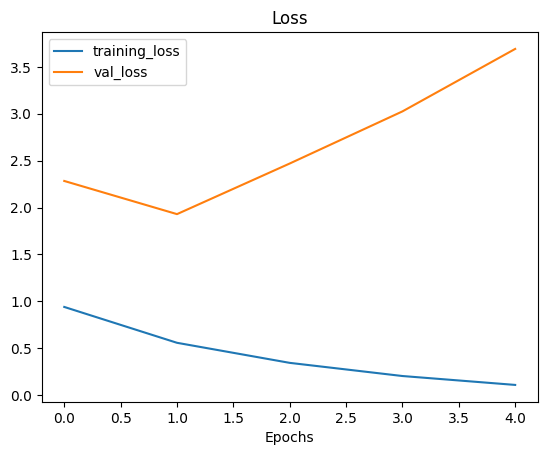

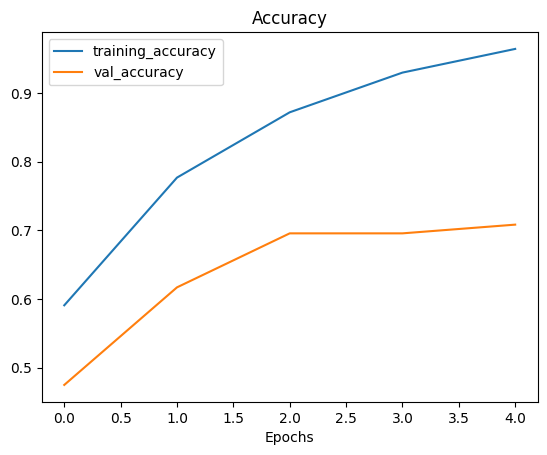

In [25]:
plot_loss_curves(history_2)

In [26]:
# Lets try with Transfer Learning with VGG19 Model

import glob
import seaborn as sns
from keras.layers import Input,Dense,Flatten,MaxPooling2D
from keras.models import Model
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.preprocessing import image
from tensorflow.keras import metrics
from IPython.display import display
from IPython.display import Image as _Imdis

In [27]:
pre_trained_model = VGG19(
                          input_shape = (224,224,3),
                          include_top= False,
                          weights = "imagenet"

)


for layer in pre_trained_model.layers[:19]:
  layer.trainable = False



model_VGG19 = Sequential([
                         pre_trained_model,
                         tf.keras.layers.MaxPool2D((2,2), strides = 2),
                         Flatten(),
                         Dense(4,activation = "softmax")
])


model_VGG19.compile(
                  optimizer = "adam",
                  loss = "categorical_crossentropy",
                  metrics ="accuracy"
)

80134624/80134624 [==============================] - 0s 0us/step


In [28]:
model_VGG19.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 512)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 4)                 18436     
                                                                 
Total params: 20042820 (76.46 MB)
Trainable params: 4738052 (18.07 MB)
Non-trainable params: 15304768 (58.38 MB)
_________________________________________________________________


In [29]:
history_3 = model_VGG19.fit(
                            train_data,
                            validation_data = test_data,
                            epochs = 5,
                            batch_size = 32,
)

Epoch 1/5
90/90 [==============================] - 30s 264ms/step - loss: 0.9394 - accuracy: 0.6352 - val_loss: 2.3417 - val_accuracy: 0.4340
Epoch 2/5
90/90 [==============================] - 17s 191ms/step - loss: 0.4086 - accuracy: 0.8509 - val_loss: 1.2122 - val_accuracy: 0.6726
Epoch 3/5
90/90 [==============================] - 18s 199ms/step - loss: 0.2541 - accuracy: 0.9028 - val_loss: 1.7265 - val_accuracy: 0.6497
Epoch 4/5
90/90 [==============================] - 18s 198ms/step - loss: 0.1628 - accuracy: 0.9408 - val_loss: 1.5686 - val_accuracy: 0.7386
Epoch 5/5
90/90 [==============================] - 18s 202ms/step - loss: 0.1090 - accuracy: 0.9613 - val_loss: 1.4624 - val_accuracy: 0.7640


In [31]:
model_VGG19_2 = Sequential([
                            pre_trained_model,
                            tf.keras.layers.MaxPool2D((2,2),strides = 2),
                            Flatten(),
                            Dense(100,activation = "relu"),
                            Dense(10,activation = "relu"),
                            Dense(4,activation = "softmax")
])

model_VGG19_2.compile(
              optimizer = "adam",
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"]
)

In [36]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(
                                            monitor = "val_accuracy",
                                            patience = 3,
                                            varbose =1,
                                            factor = 0.6,
                                            min_lr = 0.0001
)

checkpoint = ModelCheckpoint(
                            filepath = "vgg19_model.h5",
                            varbose = True,
                            save_best_only = True

)


callbacks = [checkpoint, learning_rate_reduction]

start = datetime.now()

history_4 = model_VGG19_2.fit(
                            train_data,
                            validation_data = test_data,
                            epochs = 5,
                            batch_size = 32,
                            callbacks = callbacks,
                            verbose = True
)

Epoch 1/5
90/90 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.7666

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 20s 200ms/step - loss: 0.6215 - accuracy: 0.7666 - val_loss: 1.6048 - val_accuracy: 0.6777 - lr: 0.0010
Epoch 2/5
90/90 [==============================] - 17s 185ms/step - loss: 0.1511 - accuracy: 0.9484 - val_loss: 1.8421 - val_accuracy: 0.7716 - lr: 0.0010
Epoch 3/5
90/90 [==============================] - 17s 186ms/step - loss: 0.0882 - accuracy: 0.9721 - val_loss: 2.5536 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 4/5
90/90 [==============================] - 18s 194ms/step - loss: 0.0558 - accuracy: 0.9808 - val_loss: 2.3578 - val_accuracy: 0.7716 - lr: 0.0010
Epoch 5/5
90/90 [==============================] - 17s 187ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 2.7269 - val_accuracy: 0.7487 - lr: 0.0010


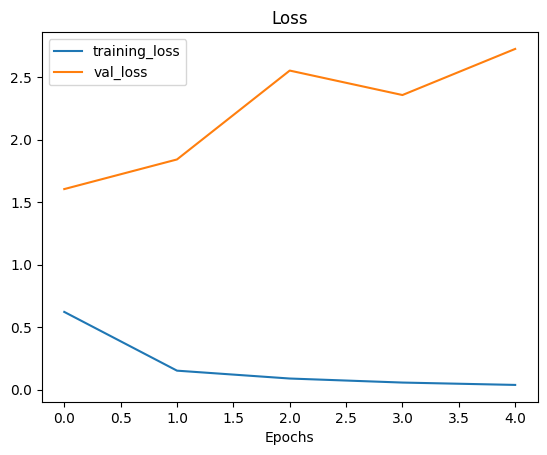

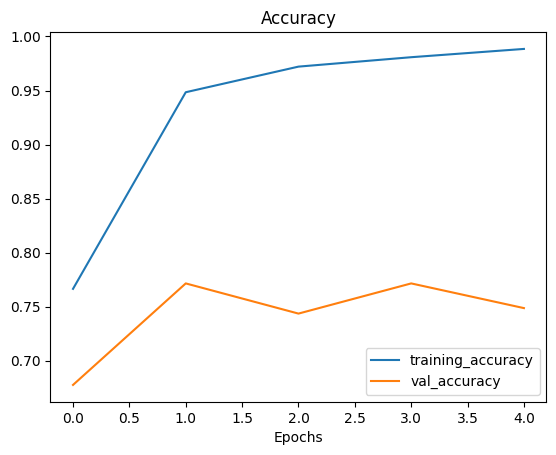

In [37]:
plot_loss_curves(history_4)